<a href="https://colab.research.google.com/github/poandpo/project-4/blob/main/AI_06_%EC%9E%84%EC%B1%84%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 
: AI hub에 있는 감성대화 말뭉치 데이터셋 사용
- feature: **사람문장1**, 사람문장2, 사람문장3
- label: 감정_대분류


In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np

tr_path = 'https://raw.githubusercontent.com/poandpo/project-4/main/%EA%B0%90%EC%84%B1%EB%8C%80%ED%99%94%EB%A7%90%EB%AD%89%EC%B9%98(%EC%B5%9C%EC%A2%85%EB%8D%B0%EC%9D%B4%ED%84%B0)_Training.csv'
te_path = 'https://raw.githubusercontent.com/poandpo/project-4/main/%EA%B0%90%EC%84%B1%EB%8C%80%ED%99%94%EB%A7%90%EB%AD%89%EC%B9%98_Validation.csv'
train = pd.read_csv(tr_path, delimiter= ',')
test = pd.read_csv(te_path, delimiter= ',')



In [ ]:
# 데이터 확인
print(train.shape)

train.head(3)

(40879, 15)


,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [ ]:
# 데이터 확인
print(test.shape)

test.head(3)

(5130, 15)


,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      40879 non-null  int64 
 1   연령      40879 non-null  object
 2   성별      40879 non-null  object
 3   상황키워드   40879 non-null  object
 4   신체질환    40879 non-null  object
 5   감정_대분류  40879 non-null  object
 6   감정_소분류  40879 non-null  object
 7   사람문장1   40879 non-null  object
 8   시스템응답1  40879 non-null  object
 9   사람문장2   40879 non-null  object
 10  시스템응답2  40879 non-null  object
 11  사람문장3   31059 non-null  object
 12  시스템응답3  31059 non-null  object
 13  사람문장4   1472 non-null   object
 14  시스템응답4  1362 non-null   object
dtypes: int64(1), object(14)
memory usage: 4.7+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      5130 non-null   int64 
 1   연령      5130 non-null   object
 2   성별      5130 non-null   object
 3   상황키워드   5130 non-null   object
 4   신체질환    5130 non-null   object
 5   감정_대분류  5130 non-null   object
 6   감정_소분류  5130 non-null   object
 7   사람문장1   5130 non-null   object
 8   시스템응답1  5130 non-null   object
 9   사람문장2   5130 non-null   object
 10  시스템응답2  5130 non-null   object
 11  사람문장3   3874 non-null   object
 12  시스템응답3  3874 non-null   object
 13  사람문장4   151 non-null    object
 14  시스템응답4  136 non-null    object
dtypes: int64(1), object(14)
memory usage: 601.3+ KB


## 데이터 선정 이유



위 데이터는 한국어로 되어있는  감성 텍스트 데이터입니다.

저는 심리상담 챗봇 서비스에 관심이 있고, 챗봇을 통해서 사람들의 우울증 유무를 파악하고 관련된 치료나 병원등으로 연결해 주는 일에 관심이 있기 때문에 위 데이터를 사용했으며, 주로 한국어를 사용하는 기업에 관심이 있기에 한글 데이터로 선정하였습니다

## 데이터 가설



1.   문장 feature(column) 3개를 한번에 모델을 돌린것이 하나의 문장 feature(column)를 사용 한것보다 더 좋은 성능을 보인다.
2.   bert가 양방향 self- attention 한것보다 더 성능이 좋다





# 전처리

## 데이터 전처리 1(문장제외)

In [ ]:
train.head(1)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN


In [ ]:
# 고유값 확인
age= train['연령'].unique() 
state=train['상황키워드'].unique() 
disease = train['신체질환'].unique()
emotion_1 =train['감정_대분류'].unique() 
emotion_2 =train['감정_소분류'].unique() 

print(f"연령 고유값:{age}", '\n')
print(f"상황키워드 고유값:{state}", '\n')
print(f"질환 고유값:{disease}", '\n')
print(f"감정_대분류 고유값:{emotion_1}", '\n')
print(f"감정_소분류 고유값:{emotion_2}", '\n')

연령 고유값:['청년' '노년' '청소년' '중년'] 

상황키워드 고유값:['연애, 결혼, 출산' '건강, 죽음' '학업 및 진로' '재정' '재정, 은퇴, 노후준비' '건강' '학교폭력/따돌림'
 '대인관계' '진로, 취업, 직장' '가족관계' '직장, 업무 스트레스' '대인관계(부부, 자녀)'] 

질환 고유값:['해당없음' '만성질환 유' '만성질환 무'] 

감정_대분류 고유값:['기쁨' '불안' '당황' '슬픔' '분노' '상처' '불안 ' '기쁨 '] 

감정_소분류 고유값:['신이 난' '스트레스 받는' '당황' '안도' '취약한' '우울한' '구역질 나는' '좌절한' '눈물이 나는' '배신당한'
 '남의 시선을 의식하는' '죄책감의' '당혹스러운' '분노' '두려운' '낙담한' '회의적인' '마비된' '혼란스러운' '흥분'
 '한심한' '염세적인' '안달하는' '걱정스러운' '조심스러운' '충격 받은' '상처' '불안' '노여워하는' '기쁨' '짜증내는'
 '환멸을 느끼는' '비통한' '혐오스러운' '억울한' '만족스러운' '부끄러운' '버려진' '고립된' '괴로워하는' '자신하는'
 '외로운' '방어적인' '편안한' '질투하는' '감사하는' '초조한' '실망한' '슬픔' '신뢰하는' '가난한, 불우한'
 '후회되는' '툴툴대는' '성가신' '열등감' '희생된' '느긋' '악의적인'] 



In [ ]:
def clean_data(df):
   # 필요없는 columns 제거 
   df.drop(labels=['번호','감정_소분류','시스템응답1','시스템응답2', '시스템응답3', '사람문장4','시스템응답4'], axis = 1, inplace=True)

   # 컬럼명 변경
   df.rename(columns={'감정_대분류':'감정', '상황키워드':'상황','사람문장1':'문장1','사람문장2':'문장2', '사람문장3':'문장3'},inplace=True )  
 
   # 결측치 삭제
   df.dropna(how = 'any', inplace = True)

def encoder_data(df):
   # 범주형 데이터를 정수로 맵핑
   df['연령']= df['연령'].map({'청소년': 0,'청년': 1, '중년':2, '노년':3})
   df['성별']= df['성별'].map({'남성': 0,'여성': 1})
   df['상황']= df['상황'].map({'연애, 결혼, 출산': 0,'건강, 죽음': 1, '건강':1,'재정': 2,'재정, 은퇴, 노후준비': 2, '학교폭력/따돌림':3,'대인관계': 4, '진로, 취업, 직장': 5, '학업 및 진로':5,'직장, 업무 스트레스':5,'가족관계': 6,'대인관계(부부, 자녀)': 6})
   df['신체질환']= df['신체질환'].map({'해당없음': 0,'만성질환 무': 1, '만성질환 유':2})
   df['감정']= df['감정'].map({'기쁨': 0,'기쁨 ': 0, '불안':1, '불안 ':1, '당황': 2, '슬픔':3, '분노':4, '상처': 5})

clean_data(train) 
clean_data(test)  

encoder_data(train)
encoder_data(test)

In [ ]:
# 중복 있는지 체크
train.T.duplicated(subset=None, keep='first')

연령      False
성별      False
상황      False
신체질환    False
감정      False
문장1     False
문장2     False
문장3     False
dtype: bool

In [ ]:
test.T.duplicated(subset=None, keep='first')

연령      False
성별      False
상황      False
신체질환    False
감정      False
문장1     False
문장2     False
문장3     False
dtype: bool

In [ ]:
train['감정'].value_counts()

1    26004
0     5055
Name: 감정, dtype: int64

In [ ]:
X_train = train.drop(labels= '감정', axis= 1)
y_train = np.array(train['감정'])
X_test = test.drop(labels= '감정', axis= 1)   #X_test= test[['문장1','문장2', '문장3' ]]
y_test = np.array(test['감정'])

In [ ]:
X_train.head(3)

,연령,성별,상황,신체질환,문장1,문장2,문장3
0,1,0,0,0,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.
1,3,0,1,2,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.
2,0,1,5,0,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.


In [ ]:
X_test.head(3)

,연령,성별,상황,신체질환,문장1,문장2,문장3
0,1,1,5,0,요즘 부모님과 많이 부딪혀.,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.
1,0,0,6,0,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,일단 좀 자야겠어.
2,0,0,3,0,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31059 entries, 0 to 40878
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      31059 non-null  int64 
 1   성별      31059 non-null  int64 
 2   상황      31059 non-null  int64 
 3   신체질환    31059 non-null  int64 
 4   문장1     31059 non-null  object
 5   문장2     31059 non-null  object
 6   문장3     31059 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3874 entries, 0 to 5129
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      3874 non-null   int64 
 1   성별      3874 non-null   int64 
 2   상황      3874 non-null   int64 
 3   신체질환    3874 non-null   int64 
 4   문장1     3874 non-null   object
 5   문장2     3874 non-null   object
 6   문장3     3874 non-null   object
dtypes: int64(4), object(3)
memory usage: 242.1+ KB


## 텍스트 전처리

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 8.0 MB/s 
     |████████████████████████████████| 448 kB 63.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 한글과 공백을 제외하고 모두 제거
def clean_text(df):
  df['문장1'] = df['문장1'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  df['문장2'] = df['문장2'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  df['문장3'] = df['문장3'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

clean_text(X_train)
clean_text(X_test)

In [ ]:
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '아', '야', '랑', '을'] #불용어 

def tokenizer(df):
  sentence1 = []
  for sentence in tqdm(df['문장1']):
      tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
      stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
      sentence1.append(stopwords_removed_sentence)

  sentence2 = []
  for sentence in tqdm(df['문장2']):
      tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
      stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
      sentence2.append(stopwords_removed_sentence)

  sentence3 = []
  for sentence in tqdm(df['문장3']):
      tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
      stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
      sentence3.append(stopwords_removed_sentence)

  df['문장1'] = sentence1
  df['문장2'] = sentence2
  df['문장3'] = sentence3

tokenizer(X_train)
tokenizer(X_test)

100%|██████████| 3874/3874 [00:09<00:00, 421.93it/s]


In [ ]:
X_train.tail(3)

,연령,성별,상황,신체질환,문장1,문장2,문장3
40876,0,1,6,0,"[엄마, 내, 꿈, 인, 작가, 응원, 주다, 지금, 안, 그렇다, 너무, 슬프다]","[내, 재능, 남, 보다, 월등하다, 거, 아니다, 취업, 안정, 적, 살다, 좋다]","[내, 다시, 내, 꿈, 어떻다, 이루다, 것, 인지, 자세하다, 설명, 드리다]"
40877,3,1,2,1,"[이렇게, 좋다, 운동, 시설, 에서, 경로, 우대, 로, 운동, 수, 있다, 차다...","[덕분, 건강, 챙기다, 수, 있다, 너무, 좋다, 안마, 기도, 있다, 내일, 운...","[운동, 뭉치다, 근육, 풀다, 것, 같다, 그렇다, 덜, 피로하다]"
40878,1,0,4,0,"[친구, 관계, 너무, 힘들다, 베풀다, 만큼, 돌아오다, 않다, 것, 같다]","[카페, 가다, 대화, 하, 거나, 같이, 술, 말다, 이야기, 것, 같다]","[직접, 서운하다, 감정, 친구, 에게, 얘기, 해]"


In [ ]:
X_test.head(3)

,연령,성별,상황,신체질환,문장1,문장2,문장3
0,1,1,5,0,"[요즘, 부모님, 많이, 부딪히다]","[난, 싶다, 일이, 있다, 부모님, 안정, 적, 인, 일만, 하라, 고, 내, 마...","[응, 그래도, 난, 내, 싶다, 일, 위해, 노력, 거야]"
1,0,0,6,0,"[엄마, 결국, 집, 나가다, 너무, 너무, 슬프다]","[엄마, 엄마, 만의, 인생, 있다, 테, 니, 가지, 말, 라고, 수가, 없다, ...","[일단, 자다]"
2,0,0,3,0,"[학교, 에서, 친구, 괴롭히다, 무리, 에게, 그만하다]","[그런데, 말, 난, 후, 나다, 괴롭히다, 보다, 불안하다]","[나, 옳다, 일, 거, 라고, 생각, 나, 까지, 괴롭히다, 신고, 거야]"


In [ ]:
sentence_1 = X_train['문장1']
sentence_2 = X_train['문장2']
sentence_3 = X_train['문장3']

sentence_1_ = X_test['문장1']
sentence_2_ = X_test['문장2']
sentence_3_ = X_test['문장3']

In [ ]:
#  정수 인코딩
token = Tokenizer(num_words=3000)

token.fit_on_texts(sentence_1)
X_encoded1  = token.texts_to_sequences(sentence_1)
X_encoded_1  = token.texts_to_sequences(sentence_1_)
X_train['문장1'] = X_encoded1
X_test['문장1'] = X_encoded_1

token.fit_on_texts(sentence_2)
X_encoded2  = token.texts_to_sequences(sentence_2)
X_encoded_2  = token.texts_to_sequences(sentence_2_)
X_train['문장2'] = X_encoded2
X_test['문장2'] = X_encoded_2

token.fit_on_texts(sentence_3)
X_encoded3  = token.texts_to_sequences(sentence_3)
X_encoded_3  = token.texts_to_sequences(sentence_3_)
X_train['문장3'] = X_encoded3
X_test['문장3'] = X_encoded_3


In [ ]:
X_train.head(3)

,연령,성별,상황,신체질환,문장1,문장2,문장3
0,1,0,0,0,"[26, 245, 358, 67, 33, 707, 1]","[90, 35, 929, 2]","[693, 401, 145, 447, 848, 14, 1, 50, 341]"
1,3,0,1,2,"[346, 956, 36, 73, 251, 686, 280, 1283, 146]","[181, 44, 315, 83, 23, 22, 29, 81]","[317, 29, 208, 59, 33, 25, 3, 153]"
2,0,1,5,0,"[713, 1759, 1699, 50, 9, 588, 116, 1177, 66, 35]","[156, 1613, 2228, 78, 1, 638, 32, 1523, 31, 4,...","[2312, 677, 27, 45, 8, 996, 20, 84, 53]"


In [ ]:
print(f'Mean length of 문장1: {np.mean([len(sent) for sent in X_encoded1], dtype=int)}')
print(f'Mean length of 문장2: {np.mean([len(sent) for sent in X_encoded2], dtype=int)}')
print(f'Mean length of 문장3: {np.mean([len(sent) for sent in X_encoded2], dtype=int)}')
print('-------------------------')
print(f'Max length of 문장1: {max(len(item) for item in X_encoded1)}')
print(f'Max length of 문장2: {max(len(item) for item in X_encoded2)}')
print(f'Max length of 문장3: {max(len(item) for item in X_encoded3)}')

Mean length of 문장1: 9
Mean length of 문장2: 10
Mean length of 문장3: 10
-------------------------
Max length of 문장1: 39
Max length of 문장2: 37
Max length of 문장3: 31


(array([1.000e+00, 9.000e+00, 1.150e+02, 4.570e+02, 0.000e+00, 9.750e+02,
        1.507e+03, 2.137e+03, 2.673e+03, 0.000e+00, 3.179e+03, 3.478e+03,
        3.519e+03, 0.000e+00, 3.316e+03, 2.827e+03, 2.416e+03, 1.730e+03,
        0.000e+00, 1.139e+03, 6.970e+02, 4.240e+02, 0.000e+00, 1.960e+02,
        1.100e+02, 4.900e+01, 2.700e+01, 0.000e+00, 1.600e+01, 1.600e+01,
        1.400e+01, 0.000e+00, 1.000e+01, 7.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  0.78,  1.56,  2.34,  3.12,  3.9 ,  4.68,  5.46,  6.24,
         7.02,  7.8 ,  8.58,  9.36, 10.14, 10.92, 11.7 , 12.48, 13.26,
        14.04, 14.82, 15.6 , 16.38, 17.16, 17.94, 18.72, 19.5 , 20.28,
        21.06, 21.84, 22.62, 23.4 , 24.18, 24.96, 25.74, 26.52, 27.3 ,
        28.08, 28.86, 29.64, 30.42, 31.2 , 31.98, 32.76, 33.54, 34.32,
        35.1 , 35.88,

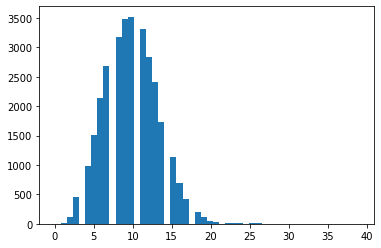

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_encoded1], bins=50)

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 20
below_threshold_len(max_len, X_encoded3)  

전체 샘플 중 길이가 20 이하인 샘플의 비율: 99.55890402137867


In [ ]:
# 패딩
max_len = 20
X_train['문장1'] = pad_sequences(X_encoded1, maxlen = max_len)
X_train['문장2'] = pad_sequences(X_encoded2, maxlen = max_len)
X_train['문장3'] = pad_sequences(X_encoded2, maxlen = max_len)

X_test['문장1'] = pad_sequences(X_encoded_1, maxlen = max_len)
X_test['문장2'] = pad_sequences(X_encoded_2, maxlen = max_len)
X_test['문장3'] = pad_sequences(X_encoded_3, maxlen = max_len)

In [ ]:
X_train

,연령,성별,상황,신체질환,문장1,문장2,문장3
0,1,0,0,0,0,0,0
1,3,0,1,2,0,0,0
2,0,1,5,0,0,0,0
3,3,0,2,1,0,0,0
5,2,1,2,0,67,8,8
...,...,...,...,...,...,...,...
40873,3,1,4,1,0,0,0
40874,1,0,4,0,0,0,0
40876,0,1,6,0,0,0,0
40877,3,1,2,1,0,0,0


# 딥러닝 방식 적용

## 모델:LSTM

### 모델: 3개 feature

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,  Activation, Dropout, Input
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(3000, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(6, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/10
385/389 [============================>.] - ETA: 0s - loss: 1.7915 - acc: 0.1790
Epoch 00001: val_acc improved from -inf to 0.18303, saving model to best_model.h5
389/389 [==============================] - 7s 7ms/step - loss: 1.7916 - acc: 0.1789 - val_loss: 1.7903 - val_acc: 0.1830
Epoch 2/10
389/389 [==============================] - ETA: 0s - loss: 1.7905 - acc: 0.1832
Epoch 00002: val_acc did not improve from 0.18303
389/389 [==============================] - 2s 5ms/step - loss: 1.7905 - acc: 0.1832 - val_loss: 1.7906 - val_acc: 0.1809
Epoch 3/10
381/389 [============================>.] - ETA: 0s - loss: 1.7901 - acc: 0.1858
Epoch 00003: val_acc did not improve from 0.18303
389/389 [==============================] - 2s 5ms/step - loss: 1.7901 - acc: 0.1860 - val_loss: 1.7931 - val_acc: 0.1788
Epoch 4/10
381/389 [============================>.] - ETA: 0s - loss: 1.7899 - acc: 0.1856
Epoch 00004: val_acc did not improve from 0.18303
389/389 [==============================] 

### 모델 2: 1개 feature

In [ ]:
X_train_2=X_train['문장1']
history = model.fit(X_train_2, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/10
379/389 [============================>.] - ETA: 0s - loss: 1.7886 - acc: 0.1753
Epoch 00001: val_acc did not improve from 0.18352
389/389 [==============================] - 4s 7ms/step - loss: 1.7886 - acc: 0.1747 - val_loss: 1.7919 - val_acc: 0.1821
Epoch 2/10
384/389 [============================>.] - ETA: 0s - loss: 1.7881 - acc: 0.1744
Epoch 00002: val_acc did not improve from 0.18352
389/389 [==============================] - 2s 5ms/step - loss: 1.7881 - acc: 0.1740 - val_loss: 1.7913 - val_acc: 0.1821
Epoch 3/10
387/389 [============================>.] - ETA: 0s - loss: 1.7871 - acc: 0.1766
Epoch 00003: val_acc did not improve from 0.18352
389/389 [==============================] - 2s 5ms/step - loss: 1.7871 - acc: 0.1768 - val_loss: 1.7914 - val_acc: 0.1819
Epoch 4/10
388/389 [============================>.] - ETA: 0s - loss: 1.7862 - acc: 0.1775
Epoch 00004: val_acc did not improve from 0.18352
389/389 [==============================] - 2s 5ms/step - loss: 1.7863 - a

모델이 성능이 좋지 않기때문에 두 개다 성능이 비슷하게 좋지않아서 유의미하지 않다

## 모델:LSTM- List

In [ ]:
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '아', '야', '랑', '을'] #불용어 

x_train = []
for sentence1 in tqdm(X_train['문장1']):
    tokenized_sentence = okt.morphs(sentence1, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)


100%|██████████| 31059/31059 [00:52<00:00, 591.38it/s]


In [ ]:
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '아', '야', '랑', '을'] #불용어 

x_test = []
for sentence_1 in tqdm(X_test['문장1']):
    tokenized_sentence = okt.morphs(sentence_1, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)


100%|██████████| 3874/3874 [00:05<00:00, 720.80it/s]


In [ ]:
#정수 인코딩
tokenizer = Tokenizer(num_words=3000)

tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
# 패딩
max_len = 20

x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(3000, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(6, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/5
382/389 [============================>.] - ETA: 0s - loss: 1.3066 - acc: 0.5204
Epoch 00001: val_acc improved from -inf to 0.58467, saving model to best_model.h5
389/389 [==============================] - 8s 7ms/step - loss: 1.3039 - acc: 0.5214 - val_loss: 1.1185 - val_acc: 0.5847
Epoch 2/5
385/389 [============================>.] - ETA: 0s - loss: 1.0326 - acc: 0.6263
Epoch 00002: val_acc improved from 0.58467 to 0.60206, saving model to best_model.h5
389/389 [==============================] - 2s 5ms/step - loss: 1.0323 - acc: 0.6264 - val_loss: 1.0803 - val_acc: 0.6021
Epoch 3/5
388/389 [============================>.] - ETA: 0s - loss: 0.9708 - acc: 0.6496
Epoch 00003: val_acc did not improve from 0.60206
389/389 [==============================] - 2s 5ms/step - loss: 0.9706 - acc: 0.6496 - val_loss: 1.0837 - val_acc: 0.6021
Epoch 4/5
382/389 [============================>.] - ETA: 0s - loss: 0.9306 - acc: 0.6670
Epoch 00004: val_acc did not improve from 0.60206
389/389 [=

In [ ]:
print("테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

122/122 [==============================] - 0s 3ms/step - loss: 1.1404 - acc: 0.5880
테스트 정확도: 0.5880


## 모델: self-attention

In [ ]:
import tensorflow as tf

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = 30000  
max_len = 20
embedding_dim = 100  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 32  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(6, activation="softmax")(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h6', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(x_train, y_train, epochs=5, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/5
389/389 [==============================] - 7s 9ms/step - loss: 1.4695 - accuracy: 0.3938 - val_loss: 1.1543 - val_accuracy: 0.5670
Epoch 2/5
389/389 [==============================] - 3s 7ms/step - loss: 1.0996 - accuracy: 0.6037 - val_loss: 1.0960 - val_accuracy: 0.5947
Epoch 3/5
389/389 [==============================] - 3s 7ms/step - loss: 1.0029 - accuracy: 0.6412 - val_loss: 1.1270 - val_accuracy: 0.5985
Epoch 4/5
389/389 [==============================] - 3s 7ms/step - loss: 0.9339 - accuracy: 0.6671 - val_loss: 1.1312 - val_accuracy: 0.6001
Epoch 5/5
389/389 [==============================] - 3s 7ms/step - loss: 0.8788 - accuracy: 0.6842 - val_loss: 1.1815 - val_accuracy: 0.5984


In [ ]:
print("테스트 정확도: %.4f" % (model2.evaluate(x_test, y_test)[1]))

122/122 [==============================] - 0s 4ms/step - loss: 1.2157 - accuracy: 0.5862
테스트 정확도: 0.5862


## 모델: kobert (한국어 버전의 BERT)

### 세개 다

In [ ]:
data_train = []
for a, label in zip(train['문장1'], train['감정']):
    data1 = []
    data1.append(a)
    data1.append(str(label))

    data_train.append(data1)

for a, label in zip(train['문장2'], train['감정']):
    data2 = []
    data2.append(a)
    data2.append(str(label))

    data_train.append(data2)

for a, label in zip(train['문장3'], train['감정']):
    data3 = []
    data3.append(a)
    data3.append(str(label))    

    data_train.append(data3)

In [ ]:
data_test = []
for b, label2 in zip(test['문장1'], test['감정']):
    data2 = []
    data2.append(b)
    data2.append(str(label2))

    data_test.append(data2)

for b, label in zip(test['문장2'], test['감정']):
    data2 = []
    data2.append(b)
    data2.append(str(label))

    data_test.append(data2)

for b, label in zip(test['문장3'], test['감정']):
    data3 = []
    data3.append(b)
    data3.append(str(label))    

    data_test.append(data3)

In [ ]:
data_train[2000]

['직장 동료가 프린트 용지를 자꾸 집에 가져가. 친한 동료였는데 너무 실망스러워.', '3']

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model3.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model3(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model3.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model3(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/1456 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.8459819555282593 train acc 0.1875
epoch 1 batch id 201 loss 1.2629890441894531 train acc 0.26826803482587064
epoch 1 batch id 401 loss 0.9965824484825134 train acc 0.4130688902743142
epoch 1 batch id 601 loss 1.511095643043518 train acc 0.4497712146422629
epoch 1 batch id 801 loss 1.2843639850616455 train acc 0.45353464419475653
epoch 1 batch id 1001 loss 1.3969718217849731 train acc 0.45438936063936064
epoch 1 batch id 1201 loss 1.4301316738128662 train acc 0.4387489592006661
epoch 1 batch id 1401 loss 1.7053678035736084 train acc 0.42854434332619556
epoch 1 train acc 0.4266179270291112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/182 [00:00<?, ?it/s]

epoch 1 test acc 0.4772312391555813


  0%|          | 0/1456 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.1360117197036743 train acc 0.578125
epoch 2 batch id 201 loss 0.8338521718978882 train acc 0.6214241293532339
epoch 2 batch id 401 loss 0.9383800029754639 train acc 0.6272210099750624
epoch 2 batch id 601 loss 1.3815181255340576 train acc 0.6085690515806988
epoch 2 batch id 801 loss 1.080618143081665 train acc 0.5888537765293383
epoch 2 batch id 1001 loss 1.2975722551345825 train acc 0.5757679820179821
epoch 2 batch id 1201 loss 1.2274043560028076 train acc 0.5519619067443797
epoch 2 batch id 1401 loss 1.584510087966919 train acc 0.5361795146324054
epoch 2 train acc 0.5327264224262579


  0%|          | 0/182 [00:00<?, ?it/s]

epoch 2 test acc 0.5027336972238288


  0%|          | 0/1456 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.9602088928222656 train acc 0.609375
epoch 3 batch id 201 loss 0.6733869314193726 train acc 0.6740516169154229
epoch 3 batch id 401 loss 0.8176555037498474 train acc 0.6824345386533666
epoch 3 batch id 601 loss 1.189437985420227 train acc 0.6674552828618968
epoch 3 batch id 801 loss 0.9783951640129089 train acc 0.650651529338327
epoch 3 batch id 1001 loss 1.0716606378555298 train acc 0.6399381868131868
epoch 3 batch id 1201 loss 1.127433180809021 train acc 0.6205635928393006
epoch 3 batch id 1401 loss 1.5154738426208496 train acc 0.6074232690935046
epoch 3 train acc 0.6046780111336033


  0%|          | 0/182 [00:00<?, ?it/s]

epoch 3 test acc 0.5060548004626951


  0%|          | 0/1456 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.8493853807449341 train acc 0.671875
epoch 4 batch id 201 loss 0.6494289040565491 train acc 0.7335976368159204
epoch 4 batch id 401 loss 0.7284006476402283 train acc 0.7415056109725686
epoch 4 batch id 601 loss 1.038472056388855 train acc 0.730813227953411
epoch 4 batch id 801 loss 0.7964385747909546 train acc 0.7177746566791511
epoch 4 batch id 1001 loss 0.9271429777145386 train acc 0.7101336163836164
epoch 4 batch id 1201 loss 0.9529590606689453 train acc 0.6915330974188176
epoch 4 batch id 1401 loss 1.315863013267517 train acc 0.6792023554603854
epoch 4 train acc 0.6767463279593214


  0%|          | 0/182 [00:00<?, ?it/s]

epoch 4 test acc 0.5147800390399075


  0%|          | 0/1456 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.7258340120315552 train acc 0.734375
epoch 5 batch id 201 loss 0.5231503844261169 train acc 0.7794620646766169
epoch 5 batch id 401 loss 0.6456245183944702 train acc 0.7845230673316709
epoch 5 batch id 601 loss 0.9394925832748413 train acc 0.7730865224625624
epoch 5 batch id 801 loss 0.6407773494720459 train acc 0.7605727215980025
epoch 5 batch id 1001 loss 0.9171044230461121 train acc 0.7514516733266733
epoch 5 batch id 1201 loss 1.0242664813995361 train acc 0.7303419025811824
epoch 5 batch id 1401 loss 1.2364308834075928 train acc 0.7157945217701641
epoch 5 train acc 0.7130092358299595


  0%|          | 0/182 [00:00<?, ?it/s]

epoch 5 test acc 0.519763953152111


### 문장 한개만

In [ ]:
!pip install mxnet
!pip install transformers==3 
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install torch
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

     |████████████████████████████████| 46.9 MB 73 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 754 kB 5.3 MB/s 
     |████████████████████████████████| 895 kB 32.8 MB/s 
     |████████████████████████████████| 3.0 MB 30.4 MB/s 
     |████████████████████████████████| 1.2 MB 38.6 MB/s 
     |████████████████████████████████| 344 kB 5.2 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595733 sha256=96ed094f28708d9fc82b9bae695837278e1ae6285848ac2a7535afd952406867
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-xm91v3vs
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pi

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp

from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
device = torch.device("cuda:0") # #GPU 사용

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model() #BERT 모델, Vocabulary 불러오기

In [ ]:
data_train = []
for a, label in zip(train['문장1'], train['감정']):
    data1 = []
    data1.append(a)
    data1.append(str(label))

    data_train.append(data1)

data_test = []
for b, label2 in zip(test['문장1'], test['감정']):
    data2 = []
    data2.append(b)
    data2.append(str(label2))

    data_test.append(data2)    

In [ ]:
# koBERT 입력
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
max_len = 20
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(data_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(data_test, 0, 1, tok, max_len, True, False)

In [ ]:
data_train[0]

(array([   2, 3096, 5330, 1788, 5947, 6855, 4575, 7784, 1767, 6553, 4102,
        3010, 7096, 1370,  517,   54,    3,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(17, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=6,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
            
        return self.classifier(out)  

In [ ]:
#BERT 모델 불러오기
model3 = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model3.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model3.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model3.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model3(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model3.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model3(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/486 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 1.841658353805542 train acc 0.171875
epoch 1 batch id 201 loss 1.045048713684082 train acc 0.34639303482587064
epoch 1 batch id 401 loss 1.0584626197814941 train acc 0.46836034912718205
epoch 1 train acc 0.4930250974658869


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 1 test acc 0.627124517839923


  0%|          | 0/486 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.9630917310714722 train acc 0.578125
epoch 2 batch id 201 loss 0.743105411529541 train acc 0.6239894278606966
epoch 2 batch id 401 loss 0.8391209840774536 train acc 0.6410925810473815
epoch 2 train acc 0.6456979640459173


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 2 test acc 0.6271546528447445


  0%|          | 0/486 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.9306678175926208 train acc 0.640625
epoch 3 batch id 201 loss 0.7073202133178711 train acc 0.6857120646766169
epoch 3 batch id 401 loss 0.7682090401649475 train acc 0.7013326059850374
epoch 3 train acc 0.7066344487762617


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 3 test acc 0.6347486740597879


  0%|          | 0/486 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.811813235282898 train acc 0.71875
epoch 4 batch id 201 loss 0.5468695163726807 train acc 0.7483675373134329
epoch 4 batch id 401 loss 0.6717877984046936 train acc 0.7619233167082294
epoch 4 train acc 0.7661563244531081


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 4 test acc 0.6429152603664416


  0%|          | 0/486 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.5950036644935608 train acc 0.8125
epoch 5 batch id 201 loss 0.42981794476509094 train acc 0.7935323383084577
epoch 5 batch id 401 loss 0.500548779964447 train acc 0.8032652743142145
epoch 5 train acc 0.8037517598007364


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 5 test acc 0.6508558341369335


#### 새로운 문장 테스트 

In [ ]:
# 새로운 문장 테스트
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("기쁨이")
            elif np.argmax(logits) == 1:
                test_eval.append("불안이")
            elif np.argmax(logits) == 2:
                test_eval.append("당황이")
            elif np.argmax(logits) == 3:
                test_eval.append("슬픔이")
            elif np.argmax(logits) == 4:
                test_eval.append("분노가")
            elif np.argmax(logits) == 5:
                test_eval.append("상처")

        print(">> 입력하신 내용에서 " + test_eval[0] + " 느껴집니다.")

In [ ]:
#질문 무한반복하기! 종료 입력시 끝
end = 1
while end == 1 :
    sentence = input("하고싶은 말을 입력해주세요 : ")
    if sentence == '종료' :
        break
    predict(sentence)
    print("\n")

하고싶은 말을 입력해주세요 : 종료


## 결론

* Lstm: 0.5880    
* self-attention: 0.5862 
* **kobert: 0.6509**

# 한계점 및 추후 해결방안
- attention 사용이 크게 유의미하지 않았다
 > 지금 사용한 데이터보다 보다 긴 문장이 있는 데이터셋 사용
- 띄어쓰기에 따라 같은 문장이라도 예측을 다르게 한다.
  > 띄어쓰기를 해주는 오픈소스 라이브러리(PyKoSpacing)
-  긍정적 감정(기쁨)이 부정적 감정보다 예측이 덜 된다
  > 더 다양한 긍정적 감정(신남, 편안한, 여유로움 등)데이터 더 넣거나 감정 소분류를 사용하기
- 시간관계상 kobert의 하이퍼파라미터 튜닝을 못해서 더 좋은 성능을 볼 수 있었지만 그러지 못했다.
> 0.7 넘는것을 목표로 하이퍼파라미터 튜닝 조정해주기




# Requirements.txt 제작 및 재구현

In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.1.1
chardet==3.0.4
charset-normalizer==2.0.7
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4


In [ ]:
pip freeze > requirements.txt